In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import scipy

In [2]:
# Compute liftoff distance stca
theta_flaps_lst = np.linspace(0, 25, 26)
if False: 
    py_stca = dict()

    for i,th in enumerate(theta_flaps_lst):

        traj_nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')
        engine_nasa_std = pd.read_csv('../cases/nasa_stca_standard/engine/Engine_to.csv')

        pyna_settings = pyna.load_settings(case_name='stca')
        pyna_settings.ac_name = 'stca'
        pyna_settings.engine_file_name = 'engine_deck_stca.csv'
        pyna_settings.phase_name_lst = ['groundroll', 'rotation', 'liftoff']
        pyna_settings.theta_flaps = th
        pyna_settings.save_results = False
        pyna_settings.tol = 1e-6

        py_stca[i] = pyna(settings=pyna_settings)
        py_stca[i].ac.k_rot = 1.2
        py_stca[i].compute_trajectory(objective='x_end')
        
        clear_output()

In [3]:
# Compute liftoff distance a10
theta_flaps_lst = np.linspace(0, 25, 26)
if False:
    py_a10 = dict()

    for i,th in enumerate(theta_flaps_lst):

        th = theta_flaps_lst[i]
        traj_nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')
        engine_nasa_std = pd.read_csv('../cases/nasa_stca_standard/engine/Engine_to.csv')

        pyna_settings = pyna.load_settings(case_name='a10')
        pyna_settings.ac_name = 'a10'
        pyna_settings.engine_file_name = 'engine_deck_a10.csv'
        pyna_settings.phase_name_lst = ['groundroll', 'rotation', 'liftoff']
        pyna_settings.theta_flaps = th
        pyna_settings.save_results = False
        pyna_settings.tol = 1e-5

        py_a10[i] = pyna(settings=pyna_settings)
        py_a10[i].ac.k_rot = 1.2
        py_a10[i].compute_trajectory(objective='x_end')
        
        clear_output()

In [5]:
# Load distances 
calc = False
if calc:
    x_x = dict()
    for ac_name in ['stca', 'a10']:

        x_x[ac_name] = dict()

        x_x[ac_name]['groundroll'] = np.zeros(26)
        x_x[ac_name]['rotation'] = np.zeros(26)
        x_x[ac_name]['liftoff'] = np.zeros(26)

        for i,th in enumerate(theta_flaps_lst):
            if ac_name == 'stca':
                x_x[ac_name]['groundroll'][i] = py_stca[i].problem.get_val('phases.groundroll.interpolated.states:x')[-1]
                x_x[ac_name]['rotation'][i] = py_stca[i].problem.get_val('phases.rotation.interpolated.states:x')[-1]
                x_x[ac_name]['liftoff'][i] = py_stca[i].problem.get_val('phases.liftoff.interpolated.states:x')[-1]
            elif ac_name == 'a10':
                x_x[ac_name]['groundroll'][i] = py_a10[i].problem.get_val('phases.groundroll.interpolated.states:x')[-1]
                x_x[ac_name]['rotation'][i] = py_a10[i].problem.get_val('phases.rotation.interpolated.states:x')[-1]
                x_x[ac_name]['liftoff'][i] = py_a10[i].problem.get_val('phases.liftoff.interpolated.states:x')[-1]
else:
    x_x = dict()
    x_x['stca'] = dict()
    x_x['stca']['groundroll'] = np.array([1075.25523207, 1064.41721661, 1054.56937271, 1045.60293435,
             1037.41904055, 1029.91402748, 1023.04405225, 1016.79211379,
             1011.0029914 , 1005.50779811, 1000.36816892,  995.58624649,
              991.1733684 ,  987.13927574,  983.49257274,  980.24351806,
              977.39988807,  974.97196588,  972.96690579,  971.39515967,
              970.26290763,  969.58033635,  969.35295282,  969.59095308,
              970.2986241 ,  971.48358502])
    x_x['stca']['rotation'] = np.array([1495.53580622, 1481.3869726 , 1468.33150333, 1456.24944644,
             1445.03182359, 1434.55957196, 1424.79849442, 1415.732913  ,
             1407.21434703, 1399.07976083, 1391.39426496, 1384.16291507,
             1377.4030069 , 1371.13005493, 1365.35625466, 1360.09717789,
             1355.36109153, 1351.15963475, 1347.50168906, 1344.39974364,
             1341.86068609, 1339.89490714, 1338.51208621, 1337.72823109,
             1337.54366654, 1337.9646129 ])
    x_x['stca']['liftoff'] = np.array([1741.23556138, 1726.33439363, 1712.64591513, 1700.0326109 ,
             1688.37415187, 1677.53726483, 1667.49323805, 1658.22901713,
             1649.59739416, 1641.438373  , 1633.8213937 , 1626.75665897,
             1620.2672366 , 1614.37355265, 1609.0929362 , 1604.4469307 ,
             1600.45564866, 1597.13563287, 1594.50220666, 1592.57718587,
             1591.37765237, 1590.92576733, 1591.24047707, 1592.35214041,
             1594.27288211, 1597.02387222])
    x_x['a10'] = dict()
    x_x['a10']['groundroll'] = np.array([2051.61976749, 2028.2321597 , 2007.35916023, 1988.74987437,
             1972.18216929, 1957.45901449, 1944.39999221, 1932.94811582,
             1922.64034674, 1912.97357504, 1904.12331437, 1896.09033978,
             1888.9041282 , 1882.58934026, 1877.16940521, 1872.6721694 ,
             1869.12103687, 1866.54614026, 1864.9713557 , 1864.4295028 ,
             1864.94448175, 1866.55119935, 1869.27444983, 1873.15209246,
             1878.20905765, 1884.48027155])
    x_x['a10']['rotation'] = np.array([2553.2230493 , 2526.34989493, 2502.11342911, 2480.24814433,
             2460.51849833, 2442.7079788 , 2426.64630387, 2412.27717702,
             2399.14395002, 2386.74822491, 2375.27024879, 2364.71491242,
             2355.11766982, 2346.51011029, 2338.91666215, 2332.36725769,
             2326.89011395, 2322.52070029, 2319.28362228, 2317.21425591,
             2316.33660895, 2316.68472094, 2318.28934069, 2321.19585601,
             2325.42461875, 2331.00910914])
    x_x['a10']['liftoff'] = np.array([3021.78212963, 2993.66763439, 2968.69063996, 2946.56690787,
             2927.04865167, 2909.91133002, 2894.99089353, 2882.23107539,
             2871.21220311, 2861.46853214, 2853.22954889, 2846.55390837,
             2841.5488418 , 2838.33365665, 2837.02200925, 2837.75593264,
             2840.70961615, 2846.10213986, 2854.16497641, 2865.20985655,
             2879.59641292, 2897.80036725, 2920.45825251, 2948.46738547,
             2982.94600493, 3025.54581312])

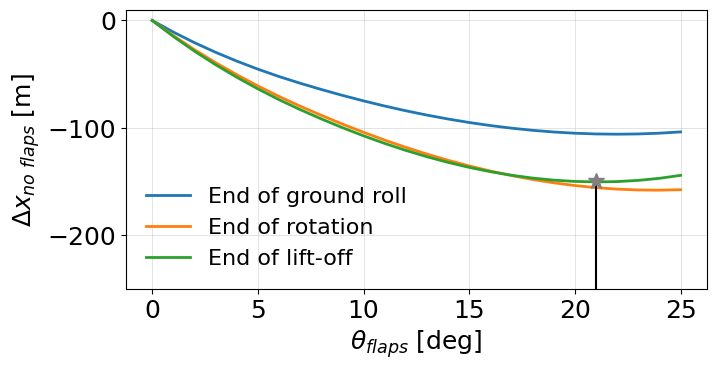

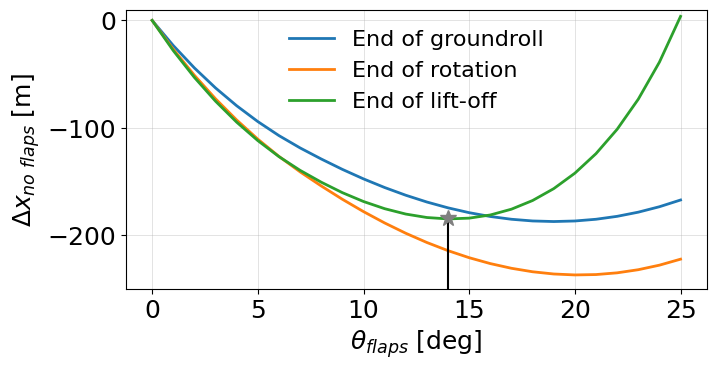

In [12]:
# Plot distances 
th_flaps_gr = dict()

fig, ax = plt.subplots(1,1, figsize=(7.5,3.7))
plt.style.use('../utils/plot.mplstyle')

ax.plot(theta_flaps_lst, x_x['stca']['groundroll']-x_x['stca']['groundroll'][0], label='End of ground roll')
ax.plot(theta_flaps_lst, x_x['stca']['rotation']-x_x['stca']['rotation'][0], label='End of rotation')
ax.plot(theta_flaps_lst, x_x['stca']['liftoff']-x_x['stca']['liftoff'][0], label='End of lift-off')

th_flaps_gr['stca'] = theta_flaps_lst[np.argmin(x_x['stca']['liftoff']-x_x['stca']['liftoff'][0])]
x_min = np.min(x_x['stca']['liftoff']-x_x['stca']['liftoff'][0])
ax.plot([th_flaps_gr['stca'], th_flaps_gr['stca']], [-250, x_min], 'k', linewidth=1.5)
ax.plot(th_flaps_gr['stca'], x_min+1, '*', markersize=12, color='grey')
ax.set_ylabel(r'$\Delta x_{no\ flaps}$ [m]')
ax.set_xlabel(r'$\theta_{flaps}$ [deg]')
ax.legend(frameon=False, fontsize=16)
ax.set_ylim([-250, 10])

fig, ax = plt.subplots(1,1, figsize=(7.5,3.7))
plt.style.use('../utils/plot.mplstyle')

ax.plot(theta_flaps_lst, x_x['a10']['groundroll']-x_x['a10']['groundroll'][0], label='End of groundroll')
ax.plot(theta_flaps_lst, x_x['a10']['rotation']-x_x['a10']['rotation'][0], label='End of rotation')
ax.plot(theta_flaps_lst, x_x['a10']['liftoff']-x_x['a10']['liftoff'][0], label='End of lift-off')
                    
th_flaps_gr['a10'] = theta_flaps_lst[np.argmin(x_x['a10']['liftoff']-x_x['a10']['liftoff'][0])]
x_min = np.min(x_x['a10']['liftoff']-x_x['a10']['liftoff'][0])
ax.plot([th_flaps_gr['a10'], th_flaps_gr['a10']], [-250, x_min], 'k', linewidth=1.5)
ax.plot(th_flaps_gr['a10'], x_min+1, '*', markersize=12, color='grey')
ax.set_ylabel(r'$\Delta x_{no\ flaps}$ [m]')
ax.set_xlabel(r'$\theta_{flaps}$ [deg]')
ax.legend(frameon=False, fontsize=16)
ax.set_ylim([-250, 10])
plt.subplots_adjust(wspace=0.3)

5.664070503401203
54.7180442573657


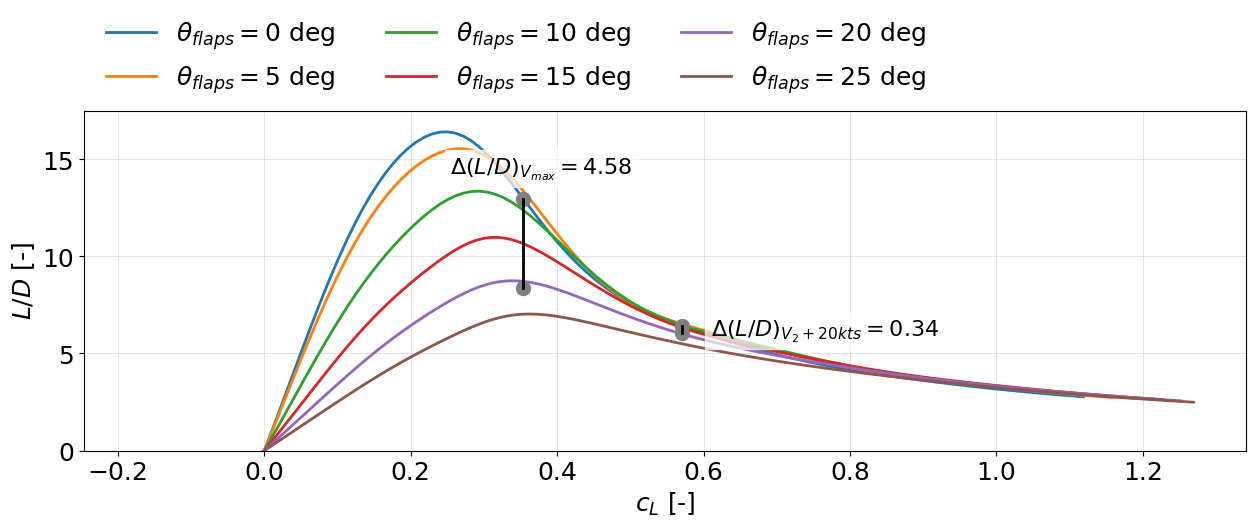

In [35]:
# Plot aerodynamics deck stca 
if True:
    pyna_settings = pyna.load_settings(case_name='stca')
    pyna_settings.ac_name = 'stca'
    py = pyna(settings = pyna_settings)
    py.ac.load_aerodynamics(settings=py.settings)

    # Create aerodynamics cubic interpolants 
    A  = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TF = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TS = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CL = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CLmax = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CD = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))

    cntr = -1
    for i, a in enumerate(py.ac.aero['alpha']):
        for j, tf in enumerate(py.ac.aero['theta_flaps']):
            for k, ts in enumerate(py.ac.aero['theta_slats']):
                cntr = cntr + 1
                A[cntr] = a
                TF[cntr] = tf
                TS[cntr] = ts
                CL[cntr] = py.ac.aero['c_l'][i,j,k]
                CLmax[cntr] = py.ac.aero['c_l_max'][i,j,k]
                CD[cntr] = py.ac.aero['c_d'][i,j,k]

    f_alpha = scipy.interpolate.Rbf(TS, TF, CL, A, function='cubic')

    f_L = scipy.interpolate.Rbf(A, TF, TS, CL, function='cubic')
    f_D = scipy.interpolate.Rbf(A, TF, TS, CD, function='cubic')
    f_LD = scipy.interpolate.Rbf(A, TF, TS, CL/CD, function='cubic')
    f_CLmax = scipy.interpolate.Rbf(A, TF, TS, CLmax, function='cubic')

    # Load engine deck
    py.settings.engine_file_name = 'engine_deck_stca.csv'
    py.engine.load_deck(py.settings)

    # Create engine deck interpolant
    F_n_interp = scipy.interpolate.RegularGridInterpolator((py.engine.deck['z'], py.engine.deck['M_0'], py.engine.deck['TS']), py.engine.deck['F_n'])

    plt.figure(figsize=(15,4.5))
    plt.style.use('../utils/plot.mplstyle')

    alpha = np.linspace(-2, 25, 100)

    for th_flaps in [0, 5, 10, 15, 20, 25]:
        ld = f_LD(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
        c_l = f_L(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
        plt.plot(c_l, ld, label=r'$\theta_{flaps}=$'+str(th_flaps)+' deg')

    for case in ['V_{2}+20 kts', 'V_{max}']:

        if case == 'V_{2}+20 kts':
            V = 197*0.51444444
        elif case == 'V_{max}':
            V = 250*0.51444444

        # Example
        mtow = py.ac.mtow
        S = py.ac.af_S_w
        rho = 1.225
        c_l = mtow*9.80665/(0.5*rho*V**2*S)


        a1 = f_alpha(-6, th_flaps_gr['stca'], c_l)
        a2 = f_alpha(-6, 0, c_l)

        LD_1 = f_LD(a1, th_flaps_gr['stca'], -6)
        LD_2 = f_LD(a2, 0, -6)

        print((LD_2-LD_1)/LD_1*100)

        plt.plot(c_l, LD_1, 'o', markersize=10, color='grey')
        plt.plot(c_l, LD_2, 'o', markersize=10, color='grey')

        plt.plot([c_l,c_l], [LD_1,LD_2], 'k')


        if case == 'V_{2}+20 kts':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(c_l+0.04, LD_2-0.5), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))
        elif case == 'V_{max}':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(c_l-0.1, LD_2+1.3), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))

    plt.ylim([0, 17.5])
    plt.xlabel(r'$c_L$ [-]')
    plt.ylabel(r'$L/D$ [-]')
    plt.legend(frameon=False, loc='lower left', bbox_to_anchor=(0,0.98), ncol=3)

0.7776336747925862
2.161502381155279


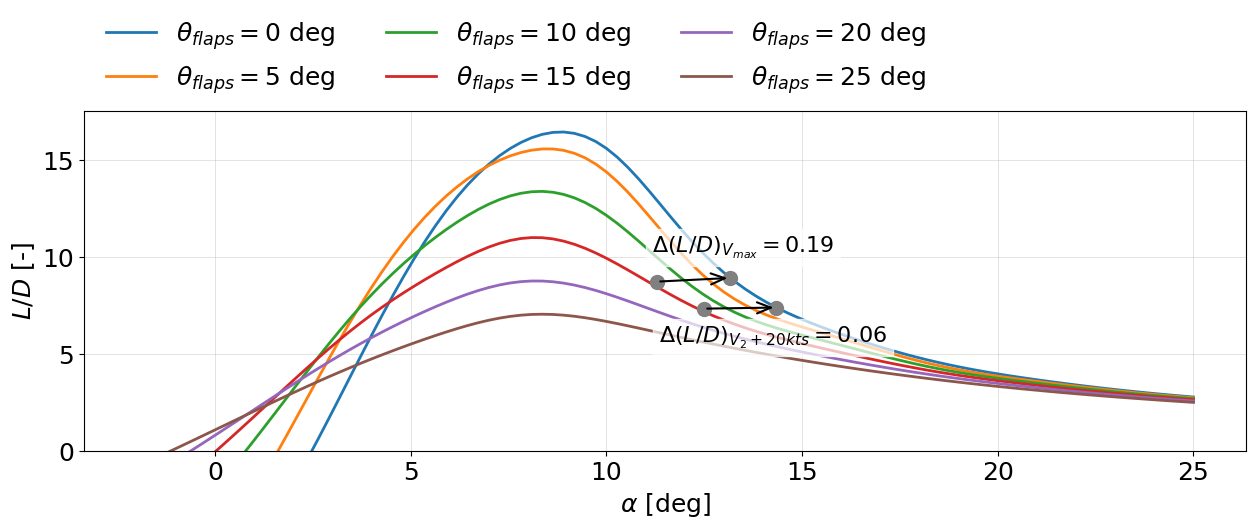

In [36]:
# Plot aerodynamics deck a10
if True:
    pyna_settings = pyna.load_settings(case_name='a10')
    pyna_settings.ac_name = 'a10'
    py = pyna(settings = pyna_settings)
    py.ac.load_aerodynamics(settings=py.settings)

    # Create aerodynamics cubic interpolants 
    A  = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TF = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TS = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CL = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CD = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))

    cntr = -1
    for i, a in enumerate(py.ac.aero['alpha']):
        for j, tf in enumerate(py.ac.aero['theta_flaps']):
            for k, ts in enumerate(py.ac.aero['theta_slats']):
                cntr = cntr + 1
                A[cntr] = a
                TF[cntr] = tf
                TS[cntr] = ts
                CL[cntr] = py.ac.aero['c_l'][i,j,k]
                CD[cntr] = py.ac.aero['c_d'][i,j,k]

    f_LD = scipy.interpolate.Rbf(A, TF, TS, CL/CD, function='cubic')
    f_L = scipy.interpolate.Rbf(A, TF, TS, CL, function='cubic')
    f_D = scipy.interpolate.Rbf(A, TF, TS, CD, function='cubic')

    f_alpha = scipy.interpolate.Rbf(TS, TF, CL, A, function='cubic')

    plt.figure(figsize=(15,4.5))
    plt.style.use('../utils/plot.mplstyle')

    alpha = np.linspace(-2, 25, 100)

    for th_flaps in [0, 5, 10, 15, 20, 25]:
        ld = f_LD(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
        plt.plot(alpha, ld, label=r'$\theta_{flaps}=$'+str(th_flaps)+' deg')

    for case in ['V_{2}+20 kts', 'V_{max}']:

        if case == 'V_{2}+20 kts':
            V = 234.4*0.51444444
        elif case == 'V_{max}':
            V = 250*0.51444444

        # Example
        mtow = py.ac.mtow
        S = py.ac.af_S_w
        rho = 1.225
        c_l = mtow*9.80665/(0.5*rho*V**2*S)


        a1 = f_alpha(-6, th_flaps_gr['a10'], c_l)
        a2 = f_alpha(-6, 0, c_l)

        LD_1 = f_LD(a1, th_flaps_gr['a10'], -6)
        LD_2 = f_LD(a2, 0, -6)

        print((LD_2-LD_1)/LD_1*100)

        plt.plot(a1, LD_1, 'o', markersize=10, color='grey')
        plt.plot(a2, LD_2, 'o', markersize=10, color='grey')

        plt.annotate('', xy=(a2, LD_2), xycoords='data', xytext=(a1, LD_1), textcoords='data',
                     arrowprops=dict(arrowstyle="->, head_length=1., head_width=0.4", connectionstyle="arc3", lw=1.5), )

        if case == 'V_{2}+20 kts':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(a2-3, LD_2-1.8), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))
        elif case == 'V_{max}':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(a2-2, LD_2+1.3), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))

    plt.ylim([0, 17.5])
    plt.xlabel(r'$\alpha$ [deg]')
    plt.ylabel(r'$L/D$ [-]')
    plt.legend(frameon=False, loc='lower left', bbox_to_anchor=(0,0.98), ncol=3)